# Long-term Energy Consumption & Outdoor Air Temperature
## OpenEI.org: Energy Information and Data

Building Type: Retail

Location: Fremont, CA

Year: 2010

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
%matplotlib inline

import IPython.core.display as di
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

### Data Import

In [3]:
df=pd.read_csv('FranceElec.csv', delimiter=';')
print('No. of rows and columns:', df.shape)
df.head(5)

No. of rows and columns: (173856, 5)


,Date - Heure,Date,Heure,Consumption,Quality
0,2009-06-05T21:00:00-07:00,2009-06-06,06:00,35984,Définitive
1,2009-06-06T00:00:00-07:00,2009-06-06,09:00,43188,Définitive
2,2009-06-06T02:30:00-07:00,2009-06-06,11:30,46959,Définitive
3,2009-06-06T03:30:00-07:00,2009-06-06,12:30,48622,Définitive
4,2009-06-06T11:30:00-07:00,2009-06-06,20:30,42578,Définitive


#### Data Types

In [4]:
df['Time']=pd.to_datetime(df['Date - Heure']) 
#DatetimeIndex, which is a pandas index that is optimized to index data with dates and times.
df['year'] = df['Time'].apply(lambda x: x.year)
df['quarter'] = df['Time'].apply(lambda x: x.quarter)
df['month'] = df['Time'].apply(lambda x: x.month)
df['day'] = df['Time'].apply(lambda x: x.day)

#### Data Conversion

In [5]:
df=df[df["Quality"]=="Définitive"]
df=df[(df.year>2007) & (df.year<2017)]
df=df.loc[:,['Time','Consumption', 'year','quarter','month','day']]
df.sort_values('Time', inplace=True, ascending=True)
df = df.reset_index(drop=True)
df["weekday"]=df.apply(lambda row: row["Time"].weekday(),axis=1)
df["weekday"] = (df["weekday"] < 5).astype(int)
print(df.shape)
print(df.Time.min())
print(df.Time.max())
df.tail(3)

(157822, 7)
2008-01-01 00:00:00
2016-12-31 22:30:00


,Time,Consumption,year,quarter,month,day,weekday
157819,2016-12-31 21:30:00,71924,2016,4,12,31,0
157820,2016-12-31 22:00:00,75424,2016,4,12,31,0
157821,2016-12-31 22:30:00,75504,2016,4,12,31,0


#### Checking Null Values

In [5]:
df.isnull().sum()

Time       0
Temp       0
Power      0
year       0
quarter    0
month      0
day        0
weekday    0
dtype: int64

## Time Series Plot

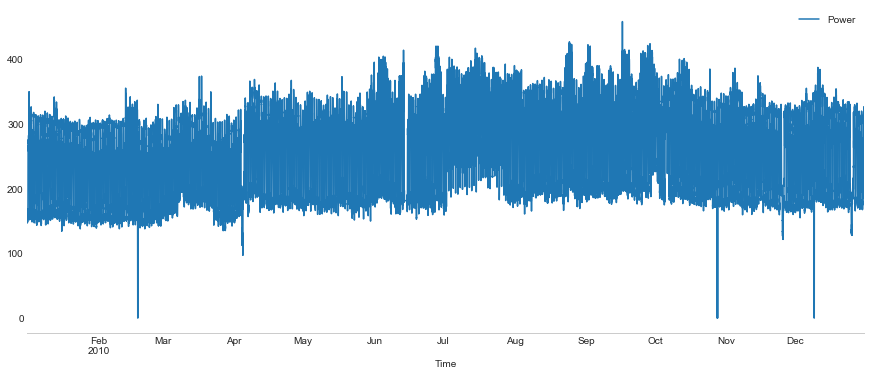

In [15]:
df1=df.loc[:,['Time','Power']]
df1.set_index('Time',inplace=True);
sns.set_style("whitegrid", {'axes.grid' : False})
df1.plot(figsize=(15, 6));
sns.despine(left=True)

### Regression Plot: Temperature and Power

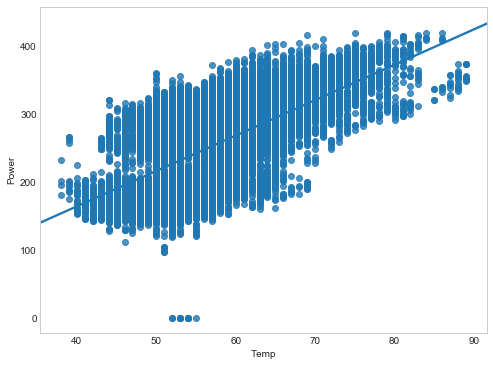

In [12]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="Temp", y="Power", data=df1)

## Power

count   34940.00
mean      282.12
std        80.94
min         0.00
25%       204.00
50%       294.80
75%       345.10
max       504.60
Name: Power, dtype: float64

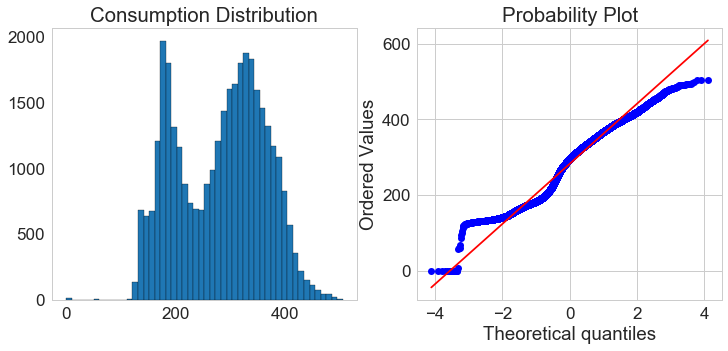

In [133]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df['Power'].hist(bins=50,edgecolor='black', grid=False)
plt.title('Consumption Distribution')

plt.subplot(1,2,2)
stats.probplot(df['Power'], plot=plt);
#print("Skewness: %f" % df['Consumption'].skew())
#print("Kurtosis: %f" % df['Consumption'].kurt())
df.Power.describe().transpose()

### Temperature Distribution

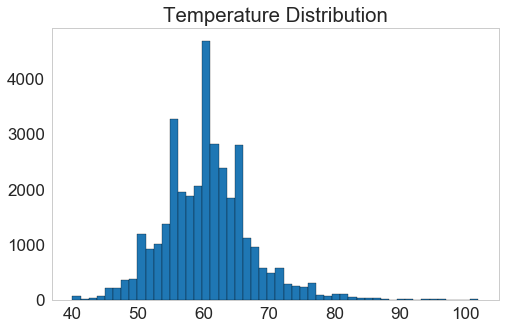

In [134]:
#sns.distplot(df['Temp']);
plt.figure(figsize=(8,5))
df['Temp'].hist(bins=50,edgecolor='black', grid=False)
plt.title('Temperature Distribution');

### Heat Map

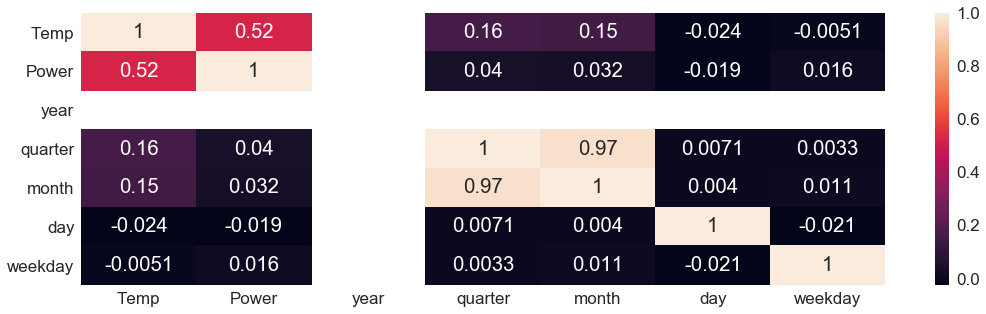

In [135]:
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(),annot=True);

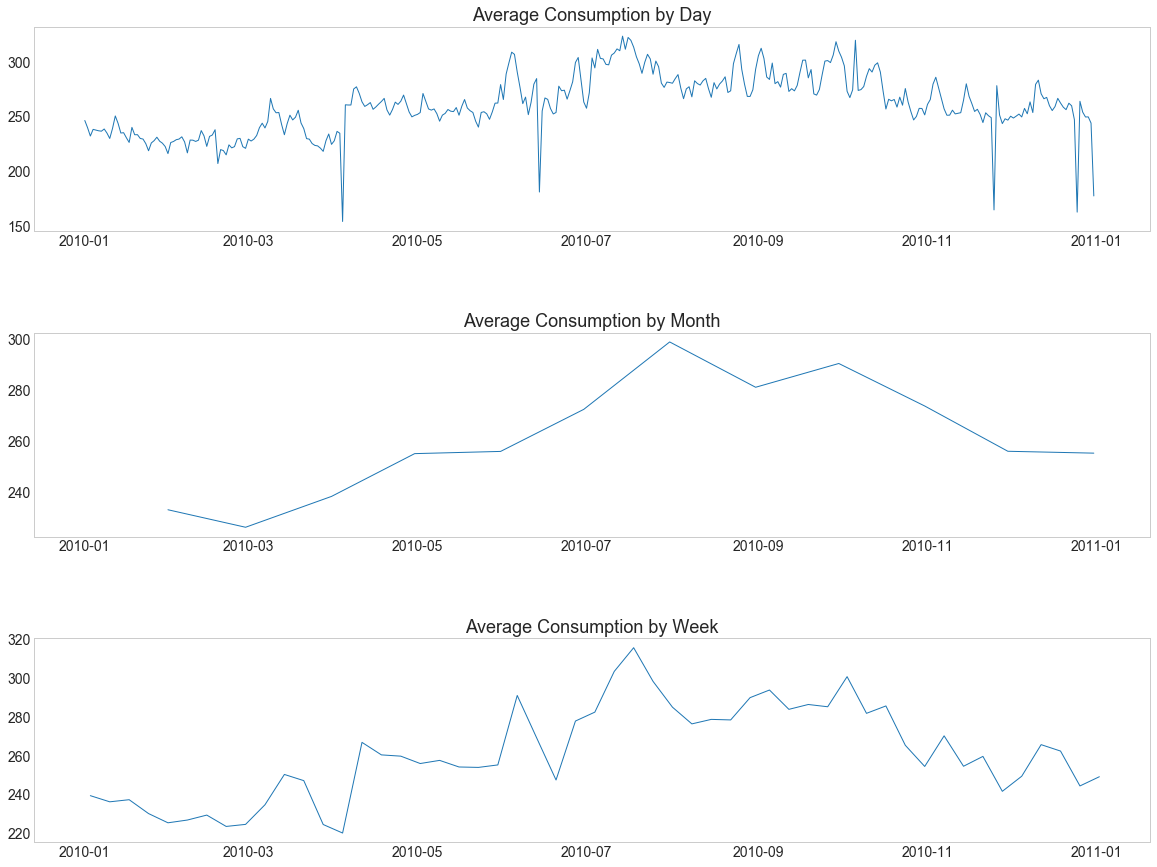

In [17]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=.5)
ax1 = fig.add_subplot(3,1,1)
ax1.plot(df1['Power'].resample('D').mean(),linewidth=1)
ax1.set_title('Average Consumption by Day', fontsize=18)
#ax1.set_ylabel('Average Consumption', fontsize=14)
#ax1.set_xlabel('Day of Crime', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2 = fig.add_subplot(3,1,2, sharex=ax1)
ax2.plot(df1['Power'].resample('M').mean(),linewidth=1)
ax2.set_title('Average Consumption by Month', fontsize=18)
#ax2.set_ylabel('# of Crimes', fontsize=14)
#ax2.set_xlabel('Month of Crime', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

ax3  = fig.add_subplot(3,1,3, sharex=ax1)
ax3.plot(df1['Power'].resample('W').mean(),linewidth=1)
ax3.set_title('Average Consumption by Week', fontsize=18)
#ax3.set_ylabel('# of Crimes', fontsize=14)
#ax3.set_xlabel('Year of Crime', fontsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)

### Consumption by Weekend/Weekday

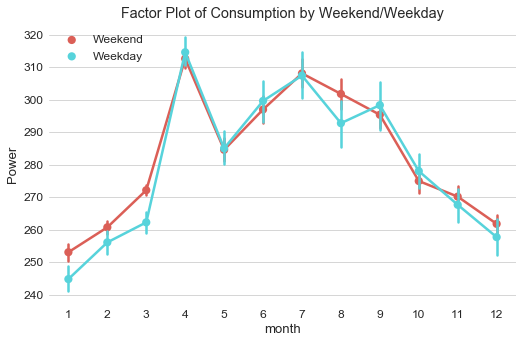

In [136]:
dic={0:'Weekday',1:'Weekend'}
df['Day'] = df.weekday.map(dic)


sns.set_context("paper", font_scale=1.5)  

plt1=sns.factorplot('month','Power',hue='Day',
                    data=df, size=5,palette='hls', aspect=1.5, legend=False);                                                                                                                                                                                                                                                                                                                                             
plt.title('Factor Plot of Consumption by Weekend/Weekday')                                                             
plt.tight_layout()                                                                                                                  
sns.despine(left=True, bottom=True) 
plt.legend(loc='upper left');

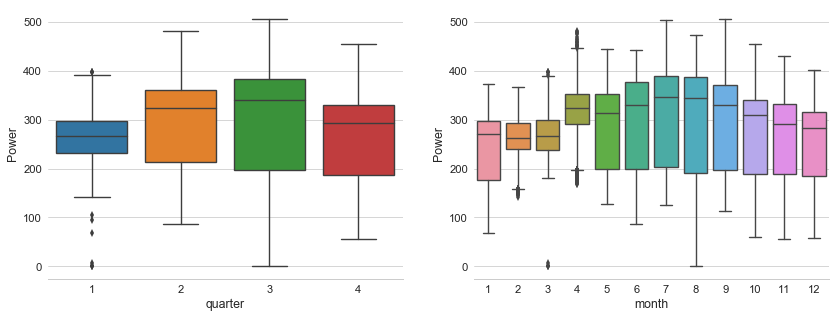

In [137]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.4)  
fig, ax = plt.subplots()
fig.set_size_inches(14, 5)
#plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.boxplot(x='quarter', y='Power',data=df);
sns.despine(left=True)

plt.subplot(1,2,2)
sns.boxplot(x='month',y='Power', data=df)
sns.despine(left=True);

### Outlier Removals based on Percentile

In [138]:
q = df["Power"].quantile(0.01)
df0=df[df["Power"] > q]
print(df.shape)
print (df0.shape)
print('Difference is : %d' % (len(df)-len(df0)))

(34940, 9)
(34587, 9)
Difference is : 353


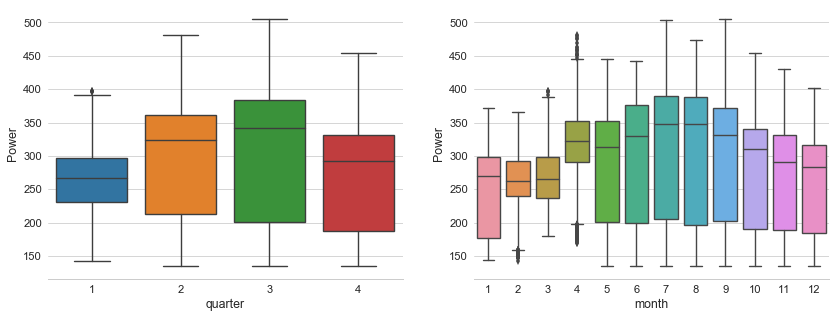

In [139]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.4)  
fig, ax = plt.subplots()
fig.set_size_inches(14, 5)
#plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.boxplot(x='quarter', y='Power',data=df0);
sns.despine(left=True)

plt.subplot(1,2,2)
sns.boxplot(x='month',y='Power', data=df0)
sns.despine(left=True);

In [140]:
df0=df0.loc[:,['Time','Power','Temp','quarter', 'month', 'weekday']]
df0.set_index('Time',inplace=True);
df0.head()

,Power,Temp,quarter,month,weekday
Time,,,,,
2010-01-01 01:15:00,149.70,54,1,1,1
2010-01-01 01:30:00,150.40,54,1,1,1
2010-01-01 01:45:00,147.00,54,1,1,1
2010-01-01 02:00:00,147.10,54,1,1,1
2010-01-01 02:15:00,145.60,53,1,1,1


### Appending with Historical Window of previous Electricity Demand

In [141]:
for obs in range(1,10):
    df0["T_" + str(obs)] = df0.Power.shift(obs)
    
df0.fillna(0.00,inplace=True)
df0.head(3)    

,Power,Temp,quarter,month,weekday,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9
Time,,,,,,,,,,,,,,
2010-01-01 01:15:00,149.70,54,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2010-01-01 01:30:00,150.40,54,1,1,1,149.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2010-01-01 01:45:00,147.00,54,1,1,1,150.40,149.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Feature Scaling

In [142]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df0[['Temp', 'quarter','month','T_1','T_2','T_3','T_4','T_5','T_6','T_7','T_8','T_9']] = scaler.fit_transform(df0
                                                                                                              [['Temp', 'quarter','month','T_1','T_2','T_3','T_4','T_5','T_6','T_7','T_8','T_9']]);

#### Train Test Split

In [143]:
# Define training and testing periods
train_start = '2010-01-01'
train_end = '2010-09-15'
test_start = '2010-09-16'
test_end = '2010-12-31'

In [145]:
# Split up into training and testing sets (still in Pandas dataframes)

X_train = df0[train_start:train_end]
del X_train['Power']

y_train = df0['Power'][train_start:train_end]

X_test = df0[test_start:test_end]
del X_test['Power']

y_test = df0['Power'][test_start:test_end]

### Train Test Datasets Size

In [146]:
print ('Number of observations in the Training set:', len(X_train))
print ('Percentage of data in Training set:', len(X_train)/len(df0)*100)
print ('Number of observations in the Test set: ', len(X_test))
print ('Percentage of data in Test set:', len(X_test)/len(df0)*100)

Number of observations in the Training set: 24541
Percentage of data in Training set: 70.95440483418626
Number of observations in the Test set:  10046
Percentage of data in Test set: 29.045595165813744


### Linear Regression Model

In [147]:
# Initialize and fit the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# R^2 (coefficient of determination) regression score function
# Mean squared error regression loss

benchmark_model = LinearRegression() #object of class LinearRegression

start = time()
benchmark_model.fit(X_train, y_train) #Fit object to training set
end = time()
y_pred=benchmark_model.predict(X_test)
print("Classifier fitted in {:.2f} seconds".format(end-start))
print("Score on Training data : {:.2f}%".format(benchmark_model.score(X_train, y_train) * 100))
print("Score on Testing data : {:.2f}%".format(benchmark_model.score(X_test, y_test) * 100))

print("RMSE : {:.3f}".format(np.sqrt(np.mean((y_test - y_pred)**2))))
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %f' % mae)

Classifier fitted in 0.02 seconds
Score on Training data : 95.18%
Score on Testing data : 95.60%
RMSE : 16.591
MAE: 9.606964


### Coefficients of Linear Regression Model

In [148]:
pd.DataFrame(benchmark_model.coef_,X_train.columns,columns=['Coeff']).T

,Temp,quarter,month,weekday,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9
Coeff,24.35,2.98,-3.54,0.14,424.06,93.68,5.91,7.62,-1.60,-31.94,-7.62,7.96,-20.04


In [149]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

poly_reg=PolynomialFeatures(degree=2)
X_poly_train=poly_reg.fit_transform(X_train)
X_poly_test=poly_reg.fit_transform(X_test)
lin_reg_pl=LinearRegression()
lin_reg_pl.fit(X_poly_train, y_train)
y_pred_pl=lin_reg_pl.predict(X_poly_test)

#Polynomial Regression Accuracy with test set
accuracy_LinReg = metrics.r2_score(y_test, y_pred_pl)
print('Mutiple Linear Regression Accuracy: ', accuracy_LinReg)

print("RMSE : {:.3f}".format(np.sqrt(np.mean((y_test - y_pred_pl)**2))))
mae = mean_absolute_error(y_test, y_pred_pl)
print('MAE: %f' % mae)

Mutiple Linear Regression Accuracy:  0.94032037188
RMSE : 19.323
MAE: 13.360380


In [150]:
# Function to fit the regressor and record performance metrics
def pipeline(reg, X_train, y_train, X_test, y_test, **kwargs):
    
    # Dictionary to hold properties of Models
    reg_props = {}
    
    # Initialize and fit the regressor, and time taken
    regressor = reg(**kwargs)
    start = time()
    regressor.fit(X_train, y_train)
    end = time()
    
    # Store the metrics for the regressor
    reg_props["name"] = reg.__name__
    reg_props["train_time"] = end - start
    reg_props["train_score"] = regressor.score(X_train, y_train)
    reg_props["test_score"] = regressor.score(X_test, y_test)
    reg_props["rmse"] = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
    reg_props["MAE"] = mean_absolute_error(y_test, regressor.predict(X_test))
    
    return reg_props

In [151]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

# Function to execute each algorithm through the pipeline
def execute_pipeline():
    # Create the list of algorithms
    regressors = [
        Ridge,
        KNeighborsRegressor,
        RandomForestRegressor,
        GradientBoostingRegressor,
        MLPRegressor,
        ExtraTreesRegressor,
            ]
    
    # To store the properties for each regressor
    props = []
    
    """
    Iterate thorugh the list of regressors,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for reg in regressors:
        properites = pipeline(reg, X_train, y_train, X_test, y_test)
        props.append(properites)
        
    return props

In [ ]:
def get_properties():
    # Obtain the properties after executing the pipeline
    properties = execute_pipeline()
    
    # Extract each individual property of the Regressors
    names = [prop["name"] for prop in properties]
    train_times = [prop["train_time"] for prop in properties]
    train_scores = [prop["train_score"] for prop in properties]
    test_scores = [prop["test_score"] for prop in properties]
    rmse_vals = [prop["rmse"] for prop in properties]
    mae_vals = [prop["MAE"] for prop in properties]
        
    # Create a DataFrame from these properties
    df = pd.DataFrame(index=names, 
                    data = {
                            "Training Times": train_times,
                            "Training Scores": train_scores,
                            "Testing Scores": test_scores,
                            "RMSE": rmse_vals,
                            "MAE":mae_vals
                      }
                  )
    
    return df

# Obain the properties in a structured DataFrame after executing the pipeline
properties = get_properties()

In [45]:
# Append the peoperties of Linear Rgression Benchmark model to the DataFrame
# Storing the properties of Selected models

properties = pd.concat(
    [properties,
    pd.Series(
    {
        "Name": "Linear Regression (Benchmark)",
        "RMSE": np.sqrt(mean_squared_error(y_test, benchmark_model.predict(X_test))),
        "MAE": mean_absolute_error(y_test, benchmark_model.predict(X_test)),
        "Training Scores": benchmark_model.score(X_train, y_train),
        "Testing Scores" :benchmark_model.score(X_test, y_test),
        "Training Times": end - start
        
    }
    ).to_frame().T.set_index(["Name"])]
)

properties

,MAE,RMSE,Testing Scores,Training Scores,Training Times
Ridge,9.50,15.89,0.94,0.93,0.02
KNeighborsRegressor,15.62,21.20,0.89,0.96,0.36
RandomForestRegressor,11.01,17.47,0.93,0.99,2.39
GradientBoostingRegressor,9.08,15.48,0.94,0.94,1.61
MLPRegressor,9.48,15.84,0.94,0.93,13.56
ExtraTreesRegressor,12.01,18.69,0.91,1.00,0.88
Linear Regression (Benchmark),9.46,15.86,0.94,0.93,0.00


## Root Mean Squared Error  & Mean Absolute Errors of Models

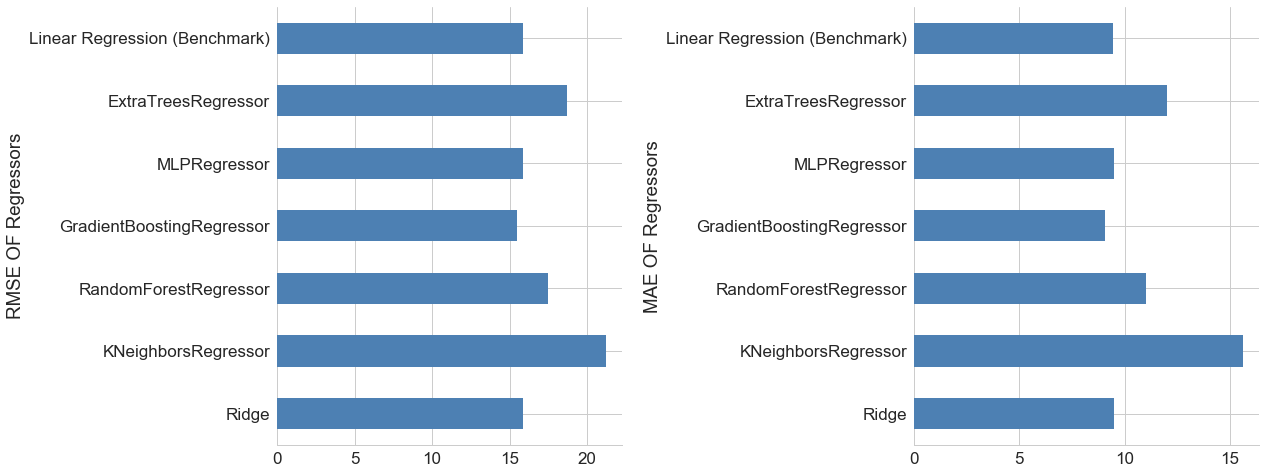

In [65]:
# Plot to compare the training time of algorithms
sns.set_context("notebook", font_scale=1.7)
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.ylabel("RMSE OF Regressors")
properties["RMSE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()


plt.subplot(1,2,2)
plt.ylabel("MAE OF Regressors")
properties["MAE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

## Training Times of Models

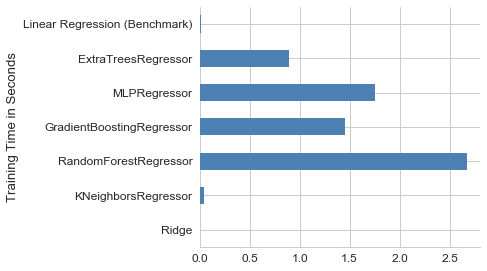

In [154]:
# Plot to compare the training time of algorithms
sns.set_context("notebook", font_scale=1.2)
plt.figure(figsize=(7,4))
plt.ylabel("Training Time in Seconds")
properties["Training Times"].plot(kind="barh", color='#4d80b3', grid=None);
sns.despine(left=True)
plt.tight_layout()

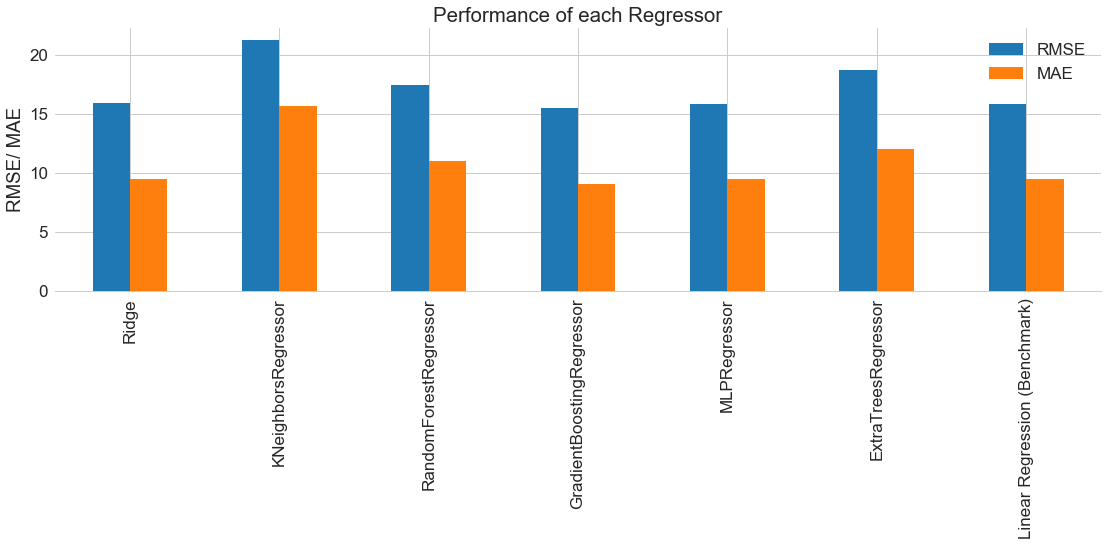

In [66]:
# Plot to compare the performance of Models on both datasets
sns.set_context("notebook", font_scale=1.7)
ax= properties[["RMSE", "MAE"]].plot(kind="bar", title="Performance of each Regressor", figsize=(16, 8))
ax.set_ylabel("RMSE/ MAE");
sns.despine(left=True)
plt.tight_layout()

In [67]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the best performing regressor
clf = RandomForestRegressor()

# Define the parameter subset
param_grid = {
    "n_estimators": [10, 50, 75, 100, 150],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [50, 100,150, 200, 250]
}

# Use Randomized search to try 20 subsets from parameter space with 5-fold cross validation
grid_search = RandomizedSearchCV(clf, param_grid, n_iter=10, scoring="r2", cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   52.7s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [10, 50, 75, 100, 150], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [50, 100, 150, 200, 250]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='r2', verbose=2)

In [68]:
#Display best params
print("Parameters of best Regressor : {}".format(grid_search.best_params_))

Parameters of best Regressor : {'n_estimators': 150, 'max_features': 'sqrt', 'max_depth': 100}


In [ ]:
best_model = grid_search.best_estimator_

# Display metrics on training and test set
print("R2 score on Training set = {:.3f}".format(best_model.score(X_train, y_train)))
print("RMSE on Training set = {:.3f}".format(np.sqrt(mean_squared_error(y_train, best_model.predict(X_train)))))
print("MAE on Training set = {:.3f}".format(mean_absolute_error(y_train, best_model.predict(X_test)))


print("R2 score on Testing set = {:.3f}".format(best_model.score(X_test, y_test)))
print("RMSE on Testing set = {:.3f}".format(np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))))
print("MAE on Testing set = {:.3f}".format(mean_absolute_error(y_test, best_model.predict(X_test)))

In [85]:
best_model = grid_search.best_estimator_

# Display metrics on training and test set
print("R2 score on Training set = {:.3f}".format(best_model.score(X_train, y_train)))
print("RMSE on Training set = {:.3f}".format(np.sqrt(mean_squared_error(y_train, best_model.predict(X_train)))))
print("MAE on Training set = {:.3f}".format(mean_absolute_error(y_train, best_model.predict(X_train))))

print("R2 score on Testing set = {:.3f}".format(best_model.score(X_test, y_test)))
print("RMSE on Testing set = {:.3f}".format(np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))))
print("MAE on Testing set = {:.3f}".format(mean_absolute_error(y_test, best_model.predict(X_test))))

R2 score on Training set = 0.993
RMSE on Training set = 5.486
MAE on Training set = 3.286
R2 score on Testing set = 0.937
RMSE on Testing set = 16.073
MAE on Testing set = 9.863


## Feature Importance

In [86]:
# Find the index of most and least important feature and display that column
print("Most important feature = {}".format(X_train.columns[np.argmax(best_model.feature_importances_)]))
print("Least important feature = {}".format(X_train.columns[np.argmin(best_model.feature_importances_)]))

# Get the indices based on feature importance in ascending order 
feature_indices = np.argsort(best_model.feature_importances_)

print("\nTop 5 most important features:-")
# Reverse the array to get important features at the beginning
for index in feature_indices[::-1][:5]:
    print(X_train.columns[index])
    
print("\nTop 5 least important features:-")
for index in feature_indices[:5]:
    print(X_train.columns[index])

Most important feature = T_1
Least important feature = weekday

Top 5 most important features:-
T_1
T_2
T_3
T_4
T_5

Top 5 least important features:-
weekday
quarter
month
Temp
T_9


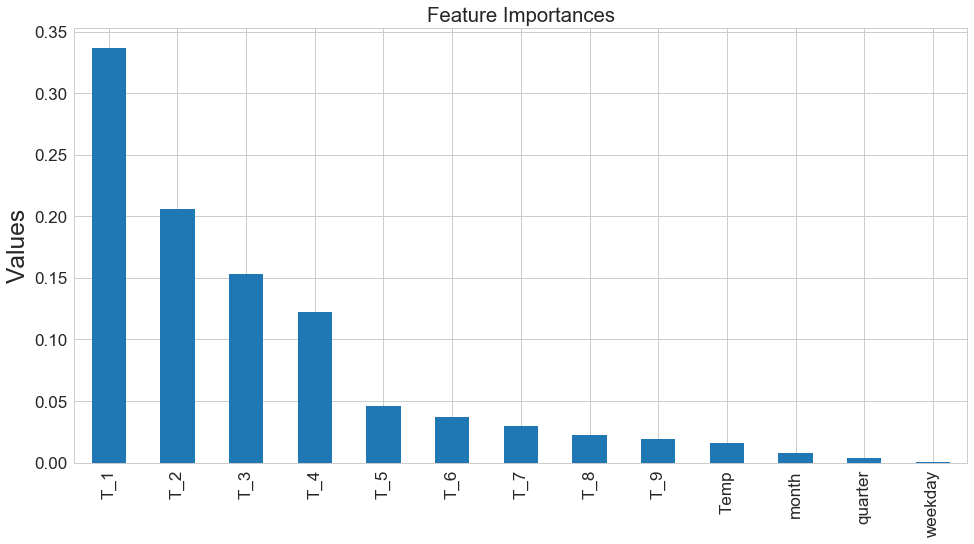

In [87]:
# Plot feature importance
fi = pd.DataFrame(index=X_train.columns[feature_indices], data=np.sort(best_model.feature_importances_))
fi.sort_values(by=0, ascending=False)
fi.head()
# Plot feature importance
fi = pd.DataFrame(index=X_train.columns[feature_indices], data=np.sort(best_model.feature_importances_))
fi.sort_values(by=0, ascending=False, inplace=True)
ax = fi.plot(kind="bar", title="Feature Importances", figsize=(16, 8))
ax.set_ylabel("Values", fontsize="large")
ax.legend_.remove()

In [88]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['T_1', 'T_2', 'T_3', 'T_4', 'T_9'], dtype='object')


##  Ensemble

XGBoost + Lasso + ElasticNet


In [89]:
from sklearn.ensemble import RandomForestRegressor
randforest = RandomForestRegressor(n_estimators=10, random_state=0)
randforest.fit(X_train, y_train)
y_pred=randforest.predict(X_test)
print("Score on Training data : {:.2f}%".format(randforest.score(X_train, y_train) * 100))
print("Score on Testing data : {:.2f}%".format(randforest.score(X_test, y_test) * 100))
print("RMSE : {:.3f}".format(np.sqrt(np.mean((y_test - y_pred)**2))))
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %f' % mae)

Score on Training data : 98.92%
Score on Testing data : 92.35%
RMSE : 17.711
MAE: 11.030796


In [127]:
lr = LinearRegression(
    n_jobs = -1
)

rd = Ridge(
    alpha = 4.84
)

rf = RandomForestRegressor(
    n_estimators = 12,
    max_depth = 3,
    n_jobs = -1
)

gb = GradientBoostingRegressor(
    n_estimators = 40,
    max_depth = 2
)

nn = MLPRegressor(
    hidden_layer_sizes = (90, 90),
    alpha = 2.75
)

In [130]:
from mlxtend.regressor import StackingRegressor
# Initialize Ensemble
model_stack = StackingRegressor(
    regressors=[rf, gb, nn, rd],
    meta_regressor=lr
)

# Fit the model on our data
model_stack.fit(X_train, y_train)

# Predict training set
model_pred = model_stack.predict(X_test)
print("Score on Training data : {:.2f}%".format(model_stack.score(X_train, y_train) * 100))
print("Score on Testing data : {:.2f}%".format(model_stack.score(X_test, y_test) * 100))
print("RMSE : {:.3f}".format(np.sqrt(np.mean((y_test - model_pred)**2))))
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, model_pred)
print('MAE: %f' % mae)

Score on Training data : 93.35%
Score on Testing data : 93.84%
RMSE : 15.894
MAE: 9.691748


## LSTM

In [90]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [91]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [96]:
dataset = df0.values
dataset = dataset.astype('float32')

In [ ]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)